# 1. Data Collection and Manipulation

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import os
import pandas as pd
from PIL import Image

folder_path = "./archive/"

In [2]:
# fixing random seed for better reproducibility
seed_value = 123
tf.keras.utils.set_random_seed(seed_value)

In [3]:
# Create a df with labels and corresponding image name
csv_file_name = "Training_set.csv"
df = pd.read_csv(os.path.join(folder_path, csv_file_name))

# select only 10 class for classification
selected_species = ['CRECENT',
                    'ATALA',
                    'ORANGE TIP',
                    'MOURNING CLOAK', 
                    'MILBERTS TORTOISESHELL',
                    'SCARCE SWALLOW',
                    'SLEEPY ORANGE', 
                    'RED CRACKER',
                    'BANDED ORANGE HELICONIAN', 
                    'BROWN SIPROETA', 
                    ]

df = df[df['label'].str.upper().isin(selected_species)].reset_index(drop=True)
#display(df)

In [4]:
# Check if the image format is valid and verify if TensorFlow can load the image, otherwise mark it as invalid.

images_path = "train"
images_folder_path = os.path.join(folder_path, images_path)
invalid_images = []
dataset = []
target_size = (100, 100)

# I can check all extension supported from PIL 
supported_exts = tuple(ext.lower() for ext in Image.registered_extensions().keys())

for filename in df['filename']:
    file_path = os.path.join(images_folder_path, filename)
    print(filename)
    if os.path.isfile(file_path):
        
        # Check if the file extension is a supported image format
        if not filename.lower().endswith(supported_exts):
            print(f"Invalid Extension for {filename}.")
            invalid_images.append(filename)
            continue

        # Try loading and preprocessing the image
        try:
            img = tf.keras.preprocessing.image.load_img(file_path, target_size=target_size)  # Load the image and resize to the target dimensions
            numeric_img = tf.keras.preprocessing.image.img_to_array(img)  # Convert image to a numeric array
            numeric_img = numeric_img / 255.  # Normalize pixel values to range [0, 1]
            dataset.append(numeric_img)  # Add the preprocessed image to the dataset
        except Exception as e:
            print(f"Error loading {filename}: {e}.")
            invalid_images.append(filename)
    else:
        print(f"Skipping {filename}, not a file.")
print()
print("images checked")
dataset_np = np.array(dataset)

print()
print("Invalid images list:", invalid_images)

# Update the df with valid images only
df = df[~df['filename'].isin(invalid_images)].reset_index(drop=True)


#-------------------------------------------------------------------
# Delete invalid images from disk (uncomment to enable deletion)

# for invalid_file in invalid_images:
#     file_path = os.path.join(images_folder_path, invalid_file)
#     try:
#         os.remove(file_path)
#         print(f"Deleted: {invalid_file}")
#     except Exception as e:
#         print(f"Failed to delete {invalid_file}: {e}")

Image_3.jpg
Image_9.jpg
Image_30.jpg
Image_45.jpg
Image_53.jpg
Image_59.jpg
Image_72.jpg
Image_73.jpg
Image_74.jpg
Image_92.jpg
Image_97.jpg
Image_104.jpg
Image_105.jpg
Image_107.jpg
Image_111.jpg
Image_120.jpg
Image_129.jpg
Image_141.jpg
Image_143.jpg
Image_148.jpg
Image_150.jpg
Image_153.jpg
Image_170.jpg
Image_177.jpg
Image_191.jpg
Image_198.jpg
Image_211.jpg
Image_212.jpg
Image_220.jpg
Image_225.jpg
Image_234.jpg
Image_237.jpg
Image_251.jpg
Image_253.jpg
Image_259.jpg
Image_266.jpg
Image_272.jpg
Image_275.jpg
Image_276.jpg
Image_278.jpg
Image_283.jpg
Image_286.jpg
Image_292.jpg
Image_295.jpg
Image_297.jpg
Image_309.jpg
Image_313.jpg
Image_317.jpg
Image_323.jpg
Image_334.jpg
Image_341.jpg
Image_349.jpg
Image_359.jpg
Image_373.jpg
Image_375.jpg
Image_380.jpg
Image_381.jpg
Image_382.jpg
Image_391.jpg
Image_397.jpg
Image_398.jpg
Image_403.jpg
Image_406.jpg
Image_408.jpg
Image_413.jpg
Image_430.jpg
Image_443.jpg
Image_448.jpg
Image_454.jpg
Image_458.jpg
Image_471.jpg
Image_472.jpg
Image

In [5]:
# Create array for labels
labels = df['label'].values

# change from string label to numeric label
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
labels_encoded = le.fit_transform(labels)

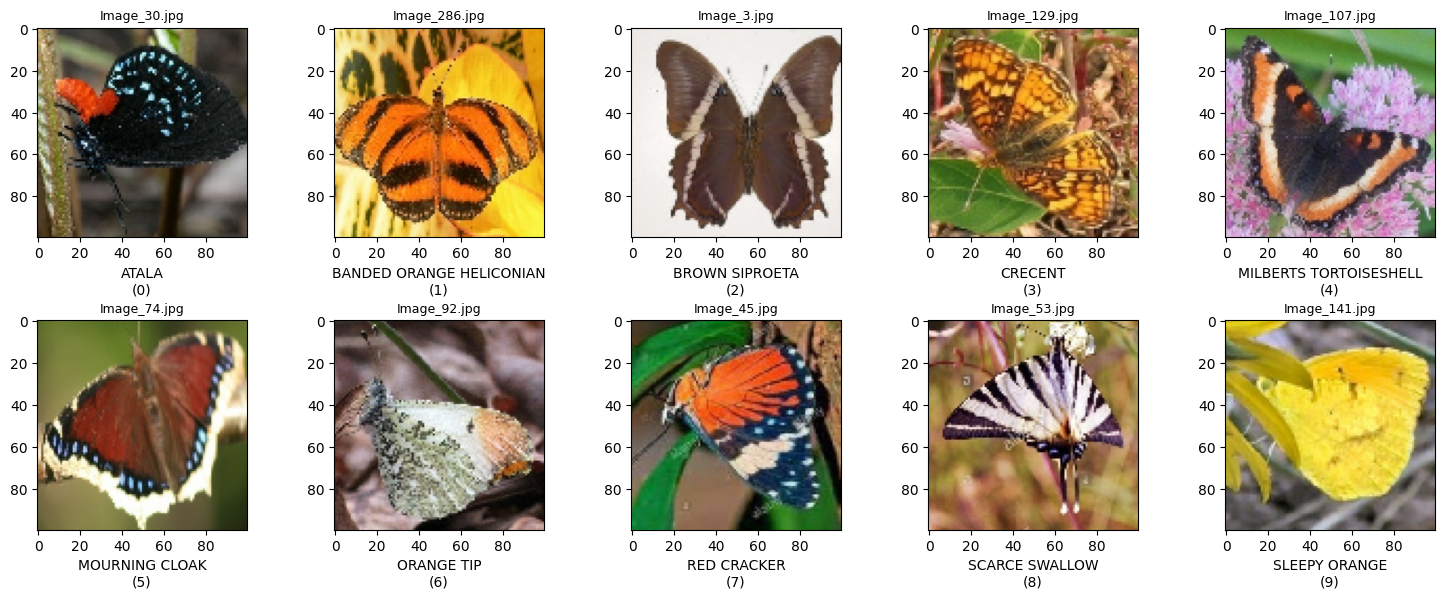

In [6]:
# A figure showing all classes sorted by index (used in report)

class_label_pairs = [(class_name, le.transform([class_name])[0]) for class_name in selected_species]
class_label_pairs.sort(key=lambda x: x[1])  # sort label

plt.figure(figsize=(15, 6))

for class_idx, (class_name, label_num) in enumerate(class_label_pairs):
    # choose first vald example
    sample_idx = df[df['label'].str.upper() == class_name].index[0]
    
    plt.subplot(2, 5, class_idx + 1)
    plt.imshow(dataset_np[sample_idx])
    plt.title(df.loc[sample_idx, 'filename'], fontsize=9)
    plt.xlabel(f"{class_name}\n({label_num})")
    #plt.axis("off")

plt.tight_layout()
#plt.savefig("dataset_preview.png")
plt.show()

### Train Validation and Test
A split of 70% training, 15% validation, and 15% testing is chosen. The training and validation sets are used to fit the model and prevent overfitting, while the test set provides an unbiased assessment of the model’s performance.

In [7]:
#default shuffle is true, stratify=labels_encoded, stratify=y_temp

from sklearn.model_selection import train_test_split

X_temp, X_test, y_temp, y_test = train_test_split(
    dataset_np, labels_encoded, test_size=0.15, random_state=seed_value, stratify=labels_encoded)

X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.176, random_state=seed_value, stratify=y_temp) # here test size is to ensure that is 15% of total, so 17.6% of 85% of total
print("shape of X_train: ",X_train.shape)
print("shape of X_val: ",X_val.shape)
print("shape of X_test: ",X_test.shape)

X_train_size_original = X_train.shape[0]
print(X_train_size_original)

shape of X_train:  (711, 100, 100, 3)
shape of X_val:  (152, 100, 100, 3)
shape of X_test:  (153, 100, 100, 3)
711


### Data augmentation

Data augmantation is a technique to increase the diversity of the training dataset by applying random (but realistic) transformations, such as image rotation or flip. In this paper, data augmentation is applied only to the training dataset, in order to keep the performance evaluation as faithful as possible to the original dataset and to avoid artificial transformations introducing bias or distorting the true estimation of the model’s generalization capability.

In [8]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# augmentation confiug
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.10,
    height_shift_range=0.10,
    zoom_range=0.15,
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode='nearest'
)

# new images for each existing one
n_copies = 2

X_train_aug = []
y_train_aug = []

for i in range(len(X_train)):
    img = X_train[i]
    label = y_train[i]
    
    # expansion to shape (1, H, W, C)
    img_expanded = np.expand_dims(img, axis=0)
    
    aug_iter = datagen.flow(img_expanded, batch_size=1, seed=seed_value) # fix seed for better reprodicibility
    
    for _ in range(n_copies):
        aug_img = next(aug_iter)[0]
        X_train_aug.append(aug_img)
        y_train_aug.append(label)

# new X,y _train
X_train = np.concatenate([X_train, np.array(X_train_aug)], axis=0)
y_train = np.concatenate([y_train, np.array(y_train_aug)], axis=0)

print("New shape of X_train: ",X_train.shape)
print("shape of X_val: ",X_val.shape)
print("shape of X_test: ",X_test.shape)

New shape of X_train:  (2133, 100, 100, 3)
shape of X_val:  (152, 100, 100, 3)
shape of X_test:  (153, 100, 100, 3)


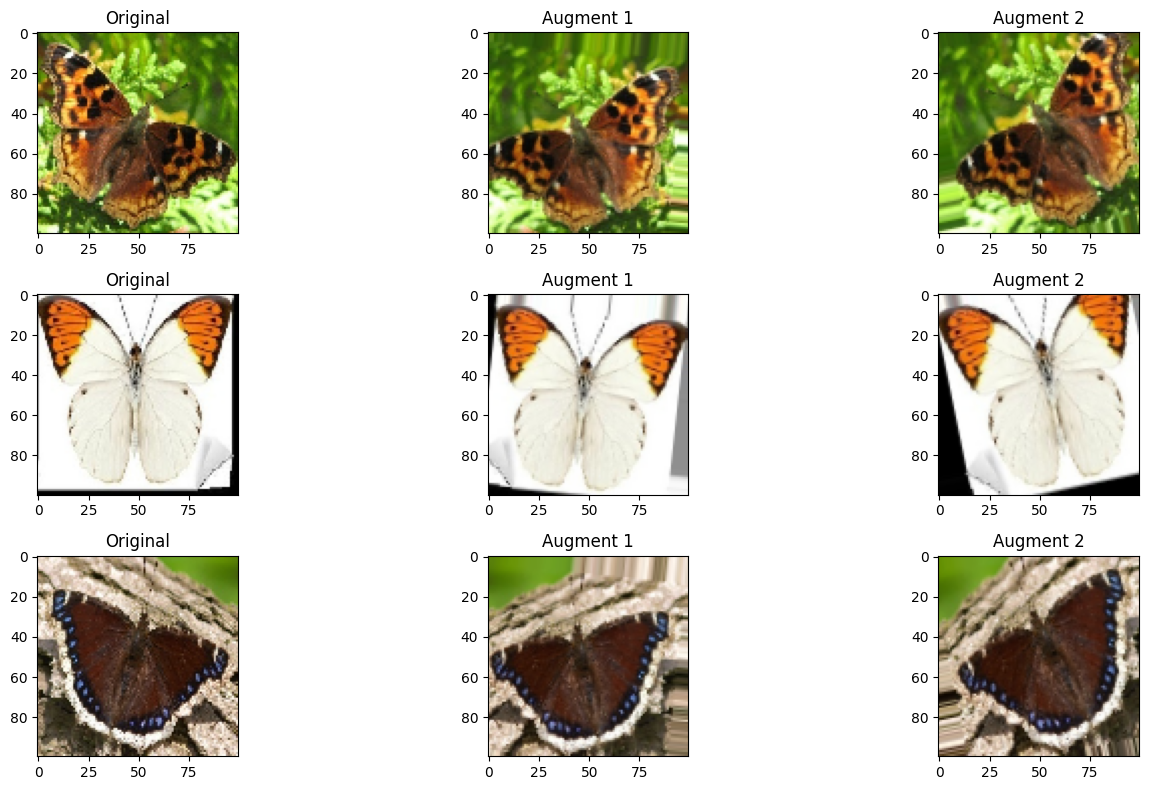

In [9]:
# plot for report iwith original and augmented pics
idx_original = [3,20,5]
fig, axes = plt.subplots(len(idx_original), 3, figsize=(15, 8))

for row in range(len(idx_original)):
    index = idx_original[row]
    axes[row][0].imshow(X_train[index])
    axes[row][0].set_title("Original")
    #axes[row][0].axis("off")
    
    axes[row][1].imshow(X_train[2 * index + X_train_size_original])
    axes[row][1].set_title("Augment 1")
    #axes[row][1].axis("off")
    
    axes[row][2].imshow(X_train[2 * index + X_train_size_original + 1])
    axes[row][2].set_title("Augment 2")
    #axes[row][2].axis("off")

plt.tight_layout()
#plt.savefig("data_aug.png")
plt.show()

# 2. Model Creation and Optimization

This paper illustrates how the performance of the constructed CNN varies with different hyperparameter settings. For this project, the hyperparameters chosen for variation were the dropout rate, the learning rate, and the lambda (L2 regularization parameter). Performing a full grid search would have been too computationally demanding, given the available hardware. Therefore, a two-step optimization approach was adopted: first, tuning the dropout rate, followed by a smaller grid search over the learning rate and the lambda.

### Generic parametric function

In [10]:
from tensorflow.keras import layers, models, regularizers, optimizers
from tensorflow.keras.callbacks import EarlyStopping

input_shape = (target_size[0], target_size[1], 3)
number_of_classes = len(selected_species)

# Generic parametric function to create the model
def build_cnn_model(
    input_shape,
    number_of_classes,
    kernel_size=(3, 3),  
    learning_rate=0.0001,    
    l2_reg=0.0,             
    dropout_rate=0.0        
):
    model = models.Sequential()
    
    model.add(layers.Input(shape=input_shape))

    model.add(layers.Conv2D(32, kernel_size, activation='relu', kernel_regularizer=regularizers.l2(l2_reg)))
    model.add(layers.MaxPooling2D((2, 2)))

    model.add(layers.Conv2D(64, kernel_size, activation='relu', kernel_regularizer=regularizers.l2(l2_reg)))
    model.add(layers.MaxPooling2D((2, 2)))
    
    model.add(layers.Conv2D(32, kernel_size, activation='relu', kernel_regularizer=regularizers.l2(l2_reg)))
    model.add(layers.MaxPooling2D((2, 2)))
    
    model.add(layers.Flatten()) 
    
    model.add(layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(l2_reg)))
    
    if dropout_rate > 0: 
        model.add(layers.Dropout(dropout_rate))
        
    model.add(layers.Dense(number_of_classes))

    optimizer = optimizers.Adam(learning_rate=learning_rate)
    model.compile(
        optimizer=optimizer,
        loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
        metrics=['accuracy']
    )
    return model


## 2.1 Dropout rate

In [11]:
# Choose btw 4 types of dropout rate.
# setting overall variables
import time

batch_size=8
dropout_rates = [0,0.10,0.35,0.5]
num_try = len(dropout_rates)
CNN_s_drop = [None] * num_try
history_drop = [None] * num_try

epochs = 50
best_val_acc = 0.

for i in range(num_try):
    start_time = time.time()
    
    # create model
    CNN_s_drop[i] = build_cnn_model(input_shape, number_of_classes, dropout_rate=dropout_rates[i])
    CNN_s_drop[i] .summary()
    
    # train
    early_stop = EarlyStopping(
        monitor='val_loss',
        patience=5,
        restore_best_weights=True
    )
    history_drop[i] = CNN_s_drop[i].fit(
        X_train, y_train,
        epochs=epochs,
        validation_data=(X_val, y_val),
        callbacks=[early_stop],
        batch_size=batch_size,
        verbose=1
    )
    best_epoch = history_drop[i].history['val_loss'].index(min(history_drop[i].history['val_loss']))
    train_acc_best = history_drop[i].history['accuracy'][best_epoch]
    val_acc_best = history_drop[i].history['val_accuracy'][best_epoch]
    effective_epochs = best_epoch + 1 # start from 0

    t = time.time()-start_time
    minutes = int(t // 60)
    seconds = int(t % 60)

    print(f"CNN - drop_rate{dropout_rates[i]}: Parameters={CNN_s_drop[i].count_params()}, Time(m:s)=({minutes}:{seconds}), Effective Epochs={effective_epochs}, Train accuracy={train_acc_best:.5f}, Validation accuracy={val_acc_best:.5f}")

    # check for best model
    if val_acc_best > best_val_acc:
        best_val_acc = val_acc_best
        best_num_layers = i + 1  # num_layers given to build_cnn_model
        best_index = i

print(f"Best model: drop_rate {dropout_rates[best_index]}")


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 98, 98, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 49, 49, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 47, 47, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 23, 23, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 21, 21, 32)          │          18,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 10, 10, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 3200)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │         204,864 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 243,370 (950.66 KB)

 Trainable params: 243,370 (950.66 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
267/267 ━━━━━━━━━━━━━━━━━━━━ 14s 39ms/step - accuracy: 0.3868 - loss: 1.7805 - val_accuracy: 0.6447 - val_loss: 1.1267
Epoch 2/50
267/267 ━━━━━━━━━━━━━━━━━━━━ 10s 37ms/step - accuracy: 0.6826 - loss: 0.9332 - val_accuracy: 0.7237 - val_loss: 0.8374
Epoch 3/50
267/267 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.7717 - loss: 0.7142 - val_accuracy: 0.7697 - val_loss: 0.7911
Epoch 4/50
267/267 ━━━━━━━━━━━━━━━━━━━━ 10s 38ms/step - accuracy: 0.8068 - loss: 0.5982 - val_accuracy: 0.7763 - val_loss: 0.7767
Epoch 5/50
267/267 ━━━━━━━━━━━━━━━━━━━━ 9s 34ms/step - accuracy: 0.8279 - loss: 0.5177 - val_accuracy: 0.7895 - val_loss: 0.7579
Epoch 6/50
267/267 ━━━━━━━━━━━━━━━━━━━━ 10s 37ms/step - accuracy: 0.8537 - loss: 0.4492 - val_accuracy: 0.7895 - val_loss: 0.7409
Epoch 7/50
267/267 ━━━━━━━━━━━━━━━━━━━━ 10s 38ms/step - accuracy: 0.8786 - loss: 0.3869 - val_accuracy: 0.7829 - val_loss: 0.7309
Epoch 8/50
267/267 ━━━━━━━━━━━━━━━━━━━━ 11s 41ms/step - accuracy: 0.8997 - loss: 0.3299 - v

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 98, 98, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 49, 49, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 47, 47, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 23, 23, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 21, 21, 32)          │          18,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 10, 10, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 3200)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │         204,864 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 243,370 (950.66 KB)

 Trainable params: 243,370 (950.66 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
267/267 ━━━━━━━━━━━━━━━━━━━━ 12s 35ms/step - accuracy: 0.3605 - loss: 1.8296 - val_accuracy: 0.6118 - val_loss: 1.2205
Epoch 2/50
267/267 ━━━━━━━━━━━━━━━━━━━━ 10s 37ms/step - accuracy: 0.6343 - loss: 1.0865 - val_accuracy: 0.7039 - val_loss: 0.8764
Epoch 3/50
267/267 ━━━━━━━━━━━━━━━━━━━━ 10s 38ms/step - accuracy: 0.7196 - loss: 0.8116 - val_accuracy: 0.7303 - val_loss: 0.8077
Epoch 4/50
267/267 ━━━━━━━━━━━━━━━━━━━━ 10s 35ms/step - accuracy: 0.7848 - loss: 0.6778 - val_accuracy: 0.7500 - val_loss: 0.7648
Epoch 5/50
267/267 ━━━━━━━━━━━━━━━━━━━━ 9s 34ms/step - accuracy: 0.8036 - loss: 0.5785 - val_accuracy: 0.7566 - val_loss: 0.7095
Epoch 6/50
267/267 ━━━━━━━━━━━━━━━━━━━━ 10s 39ms/step - accuracy: 0.8256 - loss: 0.5124 - val_accuracy: 0.7961 - val_loss: 0.6447
Epoch 7/50
267/267 ━━━━━━━━━━━━━━━━━━━━ 11s 41ms/step - accuracy: 0.8565 - loss: 0.4282 - val_accuracy: 0.7961 - val_loss: 0.6402
Epoch 8/50
267/267 ━━━━━━━━━━━━━━━━━━━━ 11s 42ms/step - accuracy: 0.8701 - loss: 0.3833 - v

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)                    │ (None, 98, 98, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 49, 49, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 47, 47, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 23, 23, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 21, 21, 32)          │          18,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 10, 10, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 3200)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │         204,864 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 243,370 (950.66 KB)

 Trainable params: 243,370 (950.66 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
267/267 ━━━━━━━━━━━━━━━━━━━━ 13s 39ms/step - accuracy: 0.2949 - loss: 1.9743 - val_accuracy: 0.5395 - val_loss: 1.3322
Epoch 2/50
267/267 ━━━━━━━━━━━━━━━━━━━━ 9s 34ms/step - accuracy: 0.5668 - loss: 1.2635 - val_accuracy: 0.7105 - val_loss: 0.9478
Epoch 3/50
267/267 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.6746 - loss: 0.9683 - val_accuracy: 0.7368 - val_loss: 0.8035
Epoch 4/50
267/267 ━━━━━━━━━━━━━━━━━━━━ 11s 40ms/step - accuracy: 0.7206 - loss: 0.8251 - val_accuracy: 0.7895 - val_loss: 0.7048
Epoch 5/50
267/267 ━━━━━━━━━━━━━━━━━━━━ 10s 38ms/step - accuracy: 0.7431 - loss: 0.7283 - val_accuracy: 0.7961 - val_loss: 0.6557
Epoch 6/50
267/267 ━━━━━━━━━━━━━━━━━━━━ 11s 42ms/step - accuracy: 0.7768 - loss: 0.6467 - val_accuracy: 0.7961 - val_loss: 0.6346
Epoch 7/50
267/267 ━━━━━━━━━━━━━━━━━━━━ 10s 38ms/step - accuracy: 0.7965 - loss: 0.5968 - val_accuracy: 0.8092 - val_loss: 0.5861
Epoch 8/50
267/267 ━━━━━━━━━━━━━━━━━━━━ 11s 39ms/step - accuracy: 0.8158 - loss: 0.5273 - v

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)                    │ (None, 98, 98, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 49, 49, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 47, 47, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 23, 23, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 21, 21, 32)          │          18,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 10, 10, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 3200)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 64)                  │         204,864 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 243,370 (950.66 KB)

 Trainable params: 243,370 (950.66 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
267/267 ━━━━━━━━━━━━━━━━━━━━ 14s 38ms/step - accuracy: 0.2218 - loss: 2.1358 - val_accuracy: 0.4539 - val_loss: 1.6635
Epoch 2/50
267/267 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.4055 - loss: 1.6228 - val_accuracy: 0.5921 - val_loss: 1.1913
Epoch 3/50
267/267 ━━━━━━━━━━━━━━━━━━━━ 10s 39ms/step - accuracy: 0.5302 - loss: 1.2969 - val_accuracy: 0.7105 - val_loss: 0.9525
Epoch 4/50
267/267 ━━━━━━━━━━━━━━━━━━━━ 10s 37ms/step - accuracy: 0.6071 - loss: 1.0969 - val_accuracy: 0.7368 - val_loss: 0.8585
Epoch 5/50
267/267 ━━━━━━━━━━━━━━━━━━━━ 10s 37ms/step - accuracy: 0.6446 - loss: 1.0114 - val_accuracy: 0.7368 - val_loss: 0.8054
Epoch 6/50
267/267 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.6779 - loss: 0.9296 - val_accuracy: 0.7632 - val_loss: 0.7256
Epoch 7/50
267/267 ━━━━━━━━━━━━━━━━━━━━ 11s 40ms/step - accuracy: 0.7159 - loss: 0.8600 - val_accuracy: 0.7632 - val_loss: 0.6927
Epoch 8/50
267/267 ━━━━━━━━━━━━━━━━━━━━ 12s 43ms/step - accuracy: 0.7323 - loss: 0.7662 - 

In [12]:
for i in range(len(dropout_rates)):
    best_epoch = history_drop[i].history['val_loss'].index(min(history_drop[i].history['val_loss']))
    train_acc_best = history_drop[i].history['accuracy'][best_epoch]
    val_acc_best = history_drop[i].history['val_accuracy'][best_epoch]
    effective_epochs = best_epoch + 1 # start from 0

    t = time.time()-start_time
    minutes = int(t // 60)
    seconds = int(t % 60)

    print(f"CNN - drop_rate{dropout_rates[i]}: Parameters={CNN_s_drop[i].count_params()}, Effective Epochs={effective_epochs}, Train accuracy={train_acc_best:.5f}, Validation accuracy={val_acc_best:.5f}")


CNN - drop_rate0: Parameters=243370, Effective Epochs=9, Train accuracy=0.91655, Validation accuracy=0.78947
CNN - drop_rate0.1: Parameters=243370, Effective Epochs=11, Train accuracy=0.90764, Validation accuracy=0.83553
CNN - drop_rate0.35: Parameters=243370, Effective Epochs=13, Train accuracy=0.88420, Validation accuracy=0.82237
CNN - drop_rate0.5: Parameters=243370, Effective Epochs=16, Train accuracy=0.83451, Validation accuracy=0.85526


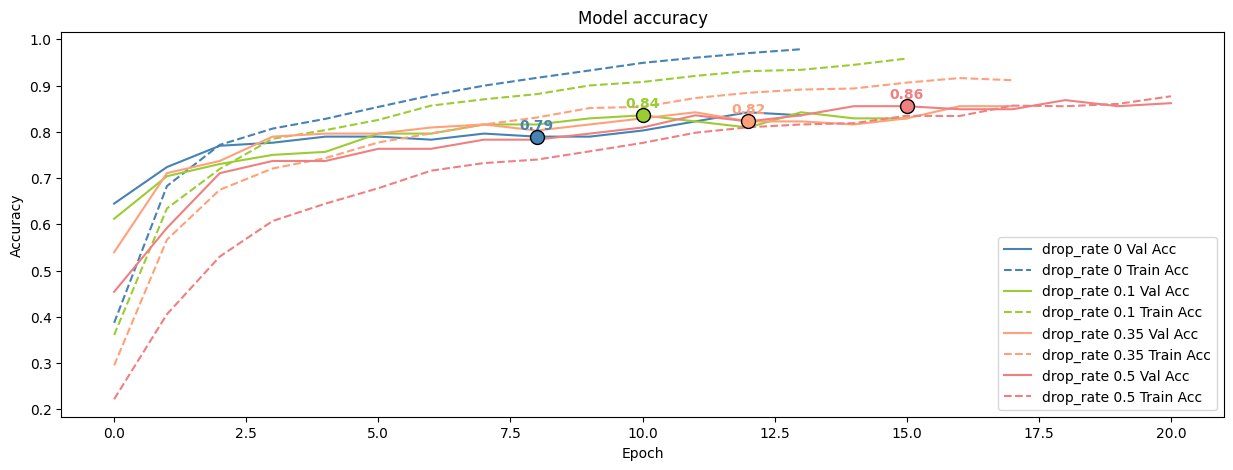

In [13]:
# graphs
plt.figure(figsize=(15,5))
colors = ['steelblue', 'yellowgreen', 'lightsalmon', 'lightcoral']

for i in range(num_try):
    # Plot validation accuracy
    plt.plot(history_drop[i].history['val_accuracy'], label=f'drop_rate {dropout_rates[i]} Val Acc', color=colors[i])
    # Plot training accuracy
    plt.plot(history_drop[i].history['accuracy'], linestyle='--', label=f'drop_rate {dropout_rates[i]} Train Acc', color=colors[i])
    
    # find best_epoch
    best_epoch = history_drop[i].history['val_loss'].index(min(history_drop[i].history['val_loss']))
    val_acc_best = history_drop[i].history['val_accuracy'][best_epoch]
    train_acc_best = history_drop[i].history['accuracy'][best_epoch]
    
    # show best point on curve
    plt.scatter(best_epoch, val_acc_best, color=colors[i], edgecolor='black', s=100, zorder=5)
    # value label
    plt.text(best_epoch, val_acc_best + 0.01,
             f'{val_acc_best:.2f}', color=colors[i],
             ha='center', va='bottom', fontweight='bold')

plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='lower right')
plt.savefig("drop_accuracy.png")
plt.show()


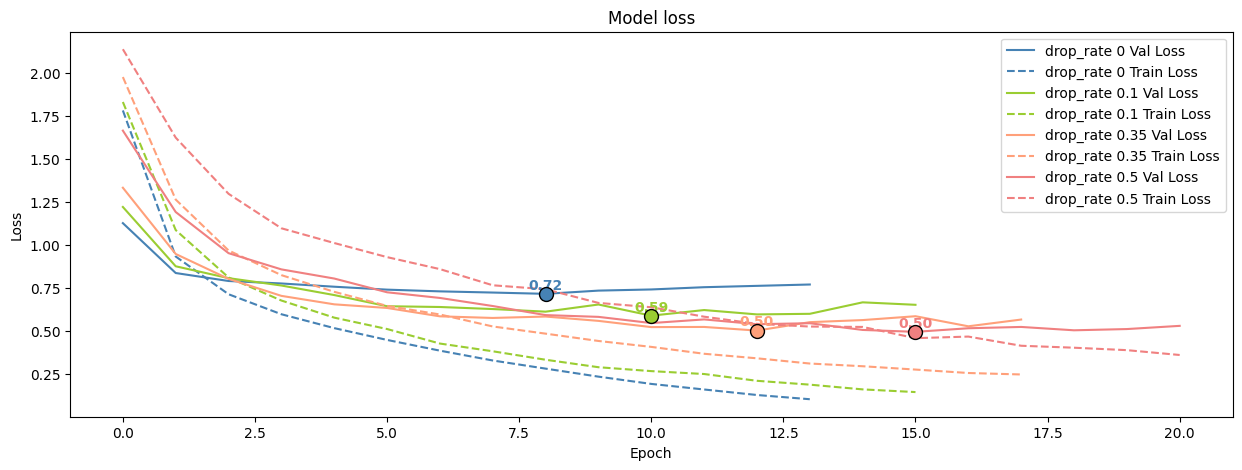

In [14]:
plt.figure(figsize=(15,5))
colors = ['steelblue', 'yellowgreen', 'lightsalmon', 'lightcoral']

for i in range(num_try):
    # Plot validation loss
    plt.plot(history_drop[i].history['val_loss'], label=f'drop_rate {dropout_rates[i]} Val Loss', color=colors[i])
    # Plot training loss
    plt.plot(history_drop[i].history['loss'], linestyle='--', label=f'drop_rate {dropout_rates[i]} Train Loss', color=colors[i])
    
    # find best_epoch
    best_epoch = history_drop[i].history['val_loss'].index(min(history_drop[i].history['val_loss']))
    val_acc_best = history_drop[i].history['val_loss'][best_epoch]
    train_acc_best = history_drop[i].history['loss'][best_epoch]
    
    # show best point on curve
    plt.scatter(best_epoch, val_acc_best, color=colors[i], edgecolor='black', s=100, zorder=5)
    # value label
    plt.text(best_epoch, val_acc_best + 0.01,
             f'{val_acc_best:.2f}', color=colors[i],
             ha='center', va='bottom', fontweight='bold')

plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.savefig("drop_loss.png")
plt.show()


### Learning Rate e Lambda regularizer parameter

In [15]:
print(dropout_rates[best_index])

0.5


In [16]:
lr_val = [1e-5, 1e-4, 1e-3, 1e-2]
lmd_val = [0, 1e-5, 1e-4, 1e-3, 1e-2]

# setting overall variables

dropout_rates = [0,0.2,0.35,0.5]
best_drop = dropout_rates[best_index]
num_try_lr = len(lr_val)
num_try_l2 = len(lmd_val)
CNN_s = [[None] * num_try_l2 for _ in range(num_try_lr)]
history = [[None] * num_try_l2 for _ in range(num_try_lr)]

epochs = 50
best_val_acc = 0.

for i in range(num_try_lr):
    for j in range(num_try_l2):
        start_time = time.time()
        
        # create model
        CNN_s[i][j] = build_cnn_model(input_shape, number_of_classes, dropout_rate=best_drop, learning_rate=lr_val[i], l2_reg=lmd_val[j])
        CNN_s[i][j] .summary()
        
        # train
        early_stop = EarlyStopping(
            monitor='val_loss',
            patience=5,
            restore_best_weights=True
        )
        history[i][j] = CNN_s[i][j].fit(
            X_train, y_train,
            epochs=epochs,
            validation_data=(X_val, y_val),
            callbacks=[early_stop],
            batch_size=batch_size,
            verbose=1
        )
        best_epoch = history[i][j].history['val_loss'].index(min(history[i][j].history['val_loss']))
        train_acc_best = history[i][j].history['accuracy'][best_epoch]
        val_acc_best = history[i][j].history['val_accuracy'][best_epoch]
        effective_epochs = best_epoch + 1 # start from 0
    
        t = time.time()-start_time
        minutes = int(t // 60)
        seconds = int(t % 60)
    
        print(f"CNN - lr_val={lr_val[i]} - lmd_val={lmd_val[j]}: Parameters={CNN_s[i][j].count_params()}, Time(m:s)=({minutes}:{seconds}), Effective Epochs={effective_epochs}, Train accuracy={train_acc_best:.5f}, Validation accuracy={val_acc_best:.5f}")
    
        # check for best model
        if val_acc_best > best_val_acc:
            best_val_acc = val_acc_best
            best_num_layers = i + 1  # num_layers given to build_cnn_model
            best_i = i
            best_j = j
print(f"Best model: lr_val={lr_val[best_i]} - lmd_val={lmd_val[best_j]}")


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)                   │ (None, 98, 98, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_12 (MaxPooling2D)      │ (None, 49, 49, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_13 (Conv2D)                   │ (None, 47, 47, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_13 (MaxPooling2D)      │ (None, 23, 23, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_14 (Conv2D)                   │ (None, 21, 21, 32)          │          18,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_14 (MaxPooling2D)      │ (None, 10, 10, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_4 (Flatten)                  │ (None, 3200)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 64)                  │         204,864 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 243,370 (950.66 KB)

 Trainable params: 243,370 (950.66 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
267/267 ━━━━━━━━━━━━━━━━━━━━ 12s 35ms/step - accuracy: 0.1247 - loss: 2.2958 - val_accuracy: 0.1908 - val_loss: 2.2754
Epoch 2/50
267/267 ━━━━━━━━━━━━━━━━━━━━ 10s 38ms/step - accuracy: 0.1810 - loss: 2.2608 - val_accuracy: 0.2697 - val_loss: 2.2375
Epoch 3/50
267/267 ━━━━━━━━━━━━━━━━━━━━ 11s 40ms/step - accuracy: 0.2452 - loss: 2.2137 - val_accuracy: 0.3224 - val_loss: 2.1745
Epoch 4/50
267/267 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.2785 - loss: 2.1384 - val_accuracy: 0.3224 - val_loss: 2.0712
Epoch 5/50
267/267 ━━━━━━━━━━━━━━━━━━━━ 10s 37ms/step - accuracy: 0.3254 - loss: 2.0283 - val_accuracy: 0.3289 - val_loss: 1.9315
Epoch 6/50
267/267 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.3783 - loss: 1.9064 - val_accuracy: 0.3882 - val_loss: 1.7854
Epoch 7/50
267/267 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.3933 - loss: 1.7880 - val_accuracy: 0.4539 - val_loss: 1.6670
Epoch 8/50
267/267 ━━━━━━━━━━━━━━━━━━━━ 9s 35ms/step - accuracy: 0.4205 - loss: 1.7094 - v

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_15 (Conv2D)                   │ (None, 98, 98, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_15 (MaxPooling2D)      │ (None, 49, 49, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_16 (Conv2D)                   │ (None, 47, 47, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_16 (MaxPooling2D)      │ (None, 23, 23, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_17 (Conv2D)                   │ (None, 21, 21, 32)          │          18,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_17 (MaxPooling2D)      │ (None, 10, 10, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_5 (Flatten)                  │ (None, 3200)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 64)                  │         204,864 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 243,370 (950.66 KB)

 Trainable params: 243,370 (950.66 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
267/267 ━━━━━━━━━━━━━━━━━━━━ 13s 37ms/step - accuracy: 0.1364 - loss: 2.2908 - val_accuracy: 0.2500 - val_loss: 2.2722
Epoch 2/50
267/267 ━━━━━━━━━━━━━━━━━━━━ 11s 39ms/step - accuracy: 0.2077 - loss: 2.2555 - val_accuracy: 0.3289 - val_loss: 2.2271
Epoch 3/50
267/267 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.2466 - loss: 2.2071 - val_accuracy: 0.3684 - val_loss: 2.1512
Epoch 4/50
267/267 ━━━━━━━━━━━━━━━━━━━━ 11s 41ms/step - accuracy: 0.2841 - loss: 2.1250 - val_accuracy: 0.4342 - val_loss: 2.0339
Epoch 5/50
267/267 ━━━━━━━━━━━━━━━━━━━━ 10s 37ms/step - accuracy: 0.3066 - loss: 2.0220 - val_accuracy: 0.4605 - val_loss: 1.9056
Epoch 6/50
267/267 ━━━━━━━━━━━━━━━━━━━━ 10s 39ms/step - accuracy: 0.3568 - loss: 1.9186 - val_accuracy: 0.5066 - val_loss: 1.7773
Epoch 7/50
267/267 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.3779 - loss: 1.8224 - val_accuracy: 0.5263 - val_loss: 1.6679
Epoch 8/50
267/267 ━━━━━━━━━━━━━━━━━━━━ 11s 39ms/step - accuracy: 0.3783 - loss: 1.7716 - 

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_18 (Conv2D)                   │ (None, 98, 98, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_18 (MaxPooling2D)      │ (None, 49, 49, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_19 (Conv2D)                   │ (None, 47, 47, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_19 (MaxPooling2D)      │ (None, 23, 23, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_20 (Conv2D)                   │ (None, 21, 21, 32)          │          18,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_20 (MaxPooling2D)      │ (None, 10, 10, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_6 (Flatten)                  │ (None, 3200)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 64)                  │         204,864 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 243,370 (950.66 KB)

 Trainable params: 243,370 (950.66 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
267/267 ━━━━━━━━━━━━━━━━━━━━ 16s 42ms/step - accuracy: 0.1224 - loss: 2.3157 - val_accuracy: 0.0987 - val_loss: 2.2941
Epoch 2/50
267/267 ━━━━━━━━━━━━━━━━━━━━ 12s 45ms/step - accuracy: 0.1763 - loss: 2.2793 - val_accuracy: 0.2697 - val_loss: 2.2527
Epoch 3/50
267/267 ━━━━━━━━━━━━━━━━━━━━ 11s 40ms/step - accuracy: 0.2344 - loss: 2.2329 - val_accuracy: 0.3553 - val_loss: 2.1884
Epoch 4/50
267/267 ━━━━━━━━━━━━━━━━━━━━ 11s 40ms/step - accuracy: 0.2743 - loss: 2.1612 - val_accuracy: 0.4276 - val_loss: 2.0818
Epoch 5/50
267/267 ━━━━━━━━━━━━━━━━━━━━ 11s 40ms/step - accuracy: 0.3521 - loss: 2.0390 - val_accuracy: 0.4342 - val_loss: 1.9288
Epoch 6/50
267/267 ━━━━━━━━━━━━━━━━━━━━ 11s 41ms/step - accuracy: 0.3732 - loss: 1.9109 - val_accuracy: 0.5329 - val_loss: 1.7649
Epoch 7/50
267/267 ━━━━━━━━━━━━━━━━━━━━ 11s 39ms/step - accuracy: 0.4112 - loss: 1.8006 - val_accuracy: 0.6118 - val_loss: 1.6313
Epoch 8/50
267/267 ━━━━━━━━━━━━━━━━━━━━ 11s 40ms/step - accuracy: 0.4468 - loss: 1.7060 - 

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_21 (Conv2D)                   │ (None, 98, 98, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_21 (MaxPooling2D)      │ (None, 49, 49, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_22 (Conv2D)                   │ (None, 47, 47, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_22 (MaxPooling2D)      │ (None, 23, 23, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_23 (Conv2D)                   │ (None, 21, 21, 32)          │          18,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_23 (MaxPooling2D)      │ (None, 10, 10, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_7 (Flatten)                  │ (None, 3200)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 64)                  │         204,864 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 243,370 (950.66 KB)

 Trainable params: 243,370 (950.66 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
267/267 ━━━━━━━━━━━━━━━━━━━━ 13s 38ms/step - accuracy: 0.1172 - loss: 2.5084 - val_accuracy: 0.1711 - val_loss: 2.4827
Epoch 2/50
267/267 ━━━━━━━━━━━━━━━━━━━━ 11s 42ms/step - accuracy: 0.1594 - loss: 2.4708 - val_accuracy: 0.3289 - val_loss: 2.4389
Epoch 3/50
267/267 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.2269 - loss: 2.4240 - val_accuracy: 0.4079 - val_loss: 2.3764
Epoch 4/50
267/267 ━━━━━━━━━━━━━━━━━━━━ 9s 35ms/step - accuracy: 0.2775 - loss: 2.3529 - val_accuracy: 0.4671 - val_loss: 2.2820
Epoch 5/50
267/267 ━━━━━━━━━━━━━━━━━━━━ 11s 43ms/step - accuracy: 0.3324 - loss: 2.2564 - val_accuracy: 0.5132 - val_loss: 2.1555
Epoch 6/50
267/267 ━━━━━━━━━━━━━━━━━━━━ 12s 44ms/step - accuracy: 0.3671 - loss: 2.1456 - val_accuracy: 0.5526 - val_loss: 2.0098
Epoch 7/50
267/267 ━━━━━━━━━━━━━━━━━━━━ 11s 41ms/step - accuracy: 0.4041 - loss: 2.0303 - val_accuracy: 0.5592 - val_loss: 1.8682
Epoch 8/50
267/267 ━━━━━━━━━━━━━━━━━━━━ 25s 56ms/step - accuracy: 0.4252 - loss: 1.9238 - v

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_24 (Conv2D)                   │ (None, 98, 98, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_24 (MaxPooling2D)      │ (None, 49, 49, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_25 (Conv2D)                   │ (None, 47, 47, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_25 (MaxPooling2D)      │ (None, 23, 23, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_26 (Conv2D)                   │ (None, 21, 21, 32)          │          18,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_26 (MaxPooling2D)      │ (None, 10, 10, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_8 (Flatten)                  │ (None, 3200)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 64)                  │         204,864 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 243,370 (950.66 KB)

 Trainable params: 243,370 (950.66 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
267/267 ━━━━━━━━━━━━━━━━━━━━ 16s 50ms/step - accuracy: 0.0970 - loss: 4.3929 - val_accuracy: 0.1579 - val_loss: 4.2863
Epoch 2/50
267/267 ━━━━━━━━━━━━━━━━━━━━ 11s 40ms/step - accuracy: 0.1678 - loss: 4.2129 - val_accuracy: 0.3158 - val_loss: 4.1179
Epoch 3/50
267/267 ━━━━━━━━━━━━━━━━━━━━ 10s 38ms/step - accuracy: 0.2147 - loss: 4.0549 - val_accuracy: 0.3684 - val_loss: 3.9556
Epoch 4/50
267/267 ━━━━━━━━━━━━━━━━━━━━ 11s 41ms/step - accuracy: 0.2766 - loss: 3.8889 - val_accuracy: 0.4013 - val_loss: 3.7800
Epoch 5/50
267/267 ━━━━━━━━━━━━━━━━━━━━ 11s 39ms/step - accuracy: 0.3000 - loss: 3.7257 - val_accuracy: 0.4671 - val_loss: 3.5992
Epoch 6/50
267/267 ━━━━━━━━━━━━━━━━━━━━ 13s 47ms/step - accuracy: 0.3469 - loss: 3.5532 - val_accuracy: 0.4934 - val_loss: 3.4079
Epoch 7/50
267/267 ━━━━━━━━━━━━━━━━━━━━ 10s 38ms/step - accuracy: 0.3821 - loss: 3.3859 - val_accuracy: 0.5461 - val_loss: 3.2305
Epoch 8/50
267/267 ━━━━━━━━━━━━━━━━━━━━ 10s 39ms/step - accuracy: 0.3872 - loss: 3.2446 - 

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_27 (Conv2D)                   │ (None, 98, 98, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_27 (MaxPooling2D)      │ (None, 49, 49, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_28 (Conv2D)                   │ (None, 47, 47, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_28 (MaxPooling2D)      │ (None, 23, 23, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_29 (Conv2D)                   │ (None, 21, 21, 32)          │          18,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_29 (MaxPooling2D)      │ (None, 10, 10, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_9 (Flatten)                  │ (None, 3200)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_18 (Dense)                     │ (None, 64)                  │         204,864 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 243,370 (950.66 KB)

 Trainable params: 243,370 (950.66 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
267/267 ━━━━━━━━━━━━━━━━━━━━ 13s 37ms/step - accuracy: 0.2574 - loss: 2.0799 - val_accuracy: 0.4474 - val_loss: 1.5719
Epoch 2/50
267/267 ━━━━━━━━━━━━━━━━━━━━ 10s 38ms/step - accuracy: 0.4566 - loss: 1.5364 - val_accuracy: 0.5987 - val_loss: 1.1867
Epoch 3/50
267/267 ━━━━━━━━━━━━━━━━━━━━ 10s 37ms/step - accuracy: 0.5785 - loss: 1.2211 - val_accuracy: 0.7237 - val_loss: 0.9072
Epoch 4/50
267/267 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.6432 - loss: 1.0385 - val_accuracy: 0.7566 - val_loss: 0.8015
Epoch 5/50
267/267 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.6892 - loss: 0.9025 - val_accuracy: 0.7697 - val_loss: 0.7130
Epoch 6/50
267/267 ━━━━━━━━━━━━━━━━━━━━ 10s 38ms/step - accuracy: 0.7300 - loss: 0.7944 - val_accuracy: 0.7895 - val_loss: 0.6497
Epoch 7/50
267/267 ━━━━━━━━━━━━━━━━━━━━ 10s 35ms/step - accuracy: 0.7595 - loss: 0.6982 - val_accuracy: 0.8092 - val_loss: 0.6086
Epoch 8/50
267/267 ━━━━━━━━━━━━━━━━━━━━ 9s 35ms/step - accuracy: 0.7651 - loss: 0.6913 - v

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_30 (Conv2D)                   │ (None, 98, 98, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_30 (MaxPooling2D)      │ (None, 49, 49, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_31 (Conv2D)                   │ (None, 47, 47, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_31 (MaxPooling2D)      │ (None, 23, 23, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_32 (Conv2D)                   │ (None, 21, 21, 32)          │          18,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_32 (MaxPooling2D)      │ (None, 10, 10, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_10 (Flatten)                 │ (None, 3200)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_20 (Dense)                     │ (None, 64)                  │         204,864 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_21 (Dense)                     │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 243,370 (950.66 KB)

 Trainable params: 243,370 (950.66 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
267/267 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - accuracy: 0.2602 - loss: 2.0619 - val_accuracy: 0.5263 - val_loss: 1.5115
Epoch 2/50
267/267 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.4876 - loss: 1.4670 - val_accuracy: 0.6974 - val_loss: 1.0430
Epoch 3/50
267/267 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.6104 - loss: 1.1956 - val_accuracy: 0.7368 - val_loss: 0.8712
Epoch 4/50
267/267 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.6756 - loss: 0.9818 - val_accuracy: 0.7500 - val_loss: 0.7527
Epoch 5/50
267/267 ━━━━━━━━━━━━━━━━━━━━ 10s 37ms/step - accuracy: 0.7018 - loss: 0.9084 - val_accuracy: 0.7829 - val_loss: 0.6691
Epoch 6/50
267/267 ━━━━━━━━━━━━━━━━━━━━ 10s 37ms/step - accuracy: 0.7150 - loss: 0.8500 - val_accuracy: 0.7829 - val_loss: 0.6323
Epoch 7/50
267/267 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.7464 - loss: 0.7521 - val_accuracy: 0.8158 - val_loss: 0.5949
Epoch 8/50
267/267 ━━━━━━━━━━━━━━━━━━━━ 10s 37ms/step - accuracy: 0.7553 - loss: 0.7178 - 

Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_33 (Conv2D)                   │ (None, 98, 98, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_33 (MaxPooling2D)      │ (None, 49, 49, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_34 (Conv2D)                   │ (None, 47, 47, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_34 (MaxPooling2D)      │ (None, 23, 23, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_35 (Conv2D)                   │ (None, 21, 21, 32)          │          18,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_35 (MaxPooling2D)      │ (None, 10, 10, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_11 (Flatten)                 │ (None, 3200)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_22 (Dense)                     │ (None, 64)                  │         204,864 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_10 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_23 (Dense)                     │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 243,370 (950.66 KB)

 Trainable params: 243,370 (950.66 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
267/267 ━━━━━━━━━━━━━━━━━━━━ 13s 37ms/step - accuracy: 0.2410 - loss: 2.1215 - val_accuracy: 0.4342 - val_loss: 1.6142
Epoch 2/50
267/267 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.4571 - loss: 1.5574 - val_accuracy: 0.6908 - val_loss: 1.1104
Epoch 3/50
267/267 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.5804 - loss: 1.2531 - val_accuracy: 0.7105 - val_loss: 0.9887
Epoch 4/50
267/267 ━━━━━━━━━━━━━━━━━━━━ 10s 37ms/step - accuracy: 0.6278 - loss: 1.0969 - val_accuracy: 0.7697 - val_loss: 0.8682
Epoch 5/50
267/267 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.6671 - loss: 0.9770 - val_accuracy: 0.7632 - val_loss: 0.7703
Epoch 6/50
267/267 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.7014 - loss: 0.8914 - val_accuracy: 0.7829 - val_loss: 0.8274
Epoch 7/50
267/267 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.7323 - loss: 0.7921 - val_accuracy: 0.8026 - val_loss: 0.6881
Epoch 8/50
267/267 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.7525 - loss: 0.7413 - 

Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_36 (Conv2D)                   │ (None, 98, 98, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_36 (MaxPooling2D)      │ (None, 49, 49, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_37 (Conv2D)                   │ (None, 47, 47, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_37 (MaxPooling2D)      │ (None, 23, 23, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_38 (Conv2D)                   │ (None, 21, 21, 32)          │          18,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_38 (MaxPooling2D)      │ (None, 10, 10, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_12 (Flatten)                 │ (None, 3200)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_24 (Dense)                     │ (None, 64)                  │         204,864 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_11 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_25 (Dense)                     │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 243,370 (950.66 KB)

 Trainable params: 243,370 (950.66 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
267/267 ━━━━━━━━━━━━━━━━━━━━ 11s 33ms/step - accuracy: 0.2743 - loss: 2.2319 - val_accuracy: 0.5921 - val_loss: 1.6046
Epoch 2/50
267/267 ━━━━━━━━━━━━━━━━━━━━ 9s 34ms/step - accuracy: 0.4998 - loss: 1.5980 - val_accuracy: 0.7500 - val_loss: 1.1488
Epoch 3/50
267/267 ━━━━━━━━━━━━━━━━━━━━ 9s 34ms/step - accuracy: 0.6174 - loss: 1.2935 - val_accuracy: 0.7632 - val_loss: 0.9791
Epoch 4/50
267/267 ━━━━━━━━━━━━━━━━━━━━ 9s 34ms/step - accuracy: 0.6474 - loss: 1.1570 - val_accuracy: 0.7368 - val_loss: 1.0117
Epoch 5/50
267/267 ━━━━━━━━━━━━━━━━━━━━ 11s 40ms/step - accuracy: 0.7084 - loss: 1.0465 - val_accuracy: 0.7697 - val_loss: 0.8840
Epoch 6/50
267/267 ━━━━━━━━━━━━━━━━━━━━ 11s 40ms/step - accuracy: 0.7323 - loss: 0.9552 - val_accuracy: 0.7566 - val_loss: 0.8801
Epoch 7/50
267/267 ━━━━━━━━━━━━━━━━━━━━ 9s 34ms/step - accuracy: 0.7543 - loss: 0.9055 - val_accuracy: 0.7829 - val_loss: 0.7881
Epoch 8/50
267/267 ━━━━━━━━━━━━━━━━━━━━ 9s 35ms/step - accuracy: 0.7722 - loss: 0.8416 - val_a

Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_39 (Conv2D)                   │ (None, 98, 98, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_39 (MaxPooling2D)      │ (None, 49, 49, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_40 (Conv2D)                   │ (None, 47, 47, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_40 (MaxPooling2D)      │ (None, 23, 23, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_41 (Conv2D)                   │ (None, 21, 21, 32)          │          18,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_41 (MaxPooling2D)      │ (None, 10, 10, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_13 (Flatten)                 │ (None, 3200)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_26 (Dense)                     │ (None, 64)                  │         204,864 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_12 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_27 (Dense)                     │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 243,370 (950.66 KB)

 Trainable params: 243,370 (950.66 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
267/267 ━━━━━━━━━━━━━━━━━━━━ 11s 33ms/step - accuracy: 0.2508 - loss: 3.6422 - val_accuracy: 0.5197 - val_loss: 2.8155
Epoch 2/50
267/267 ━━━━━━━━━━━━━━━━━━━━ 9s 33ms/step - accuracy: 0.4613 - loss: 2.5800 - val_accuracy: 0.6645 - val_loss: 2.0914
Epoch 3/50
267/267 ━━━━━━━━━━━━━━━━━━━━ 9s 33ms/step - accuracy: 0.5945 - loss: 2.1542 - val_accuracy: 0.6842 - val_loss: 1.8494
Epoch 4/50
267/267 ━━━━━━━━━━━━━━━━━━━━ 9s 34ms/step - accuracy: 0.6474 - loss: 1.9431 - val_accuracy: 0.7303 - val_loss: 1.7365
Epoch 5/50
267/267 ━━━━━━━━━━━━━━━━━━━━ 9s 33ms/step - accuracy: 0.6896 - loss: 1.8040 - val_accuracy: 0.7368 - val_loss: 1.6454
Epoch 6/50
267/267 ━━━━━━━━━━━━━━━━━━━━ 9s 34ms/step - accuracy: 0.7182 - loss: 1.6891 - val_accuracy: 0.7632 - val_loss: 1.5526
Epoch 7/50
267/267 ━━━━━━━━━━━━━━━━━━━━ 9s 34ms/step - accuracy: 0.7384 - loss: 1.5814 - val_accuracy: 0.7961 - val_loss: 1.4729
Epoch 8/50
267/267 ━━━━━━━━━━━━━━━━━━━━ 10s 31ms/step - accuracy: 0.7440 - loss: 1.5288 - val_ac

Model: "sequential_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_42 (Conv2D)                   │ (None, 98, 98, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_42 (MaxPooling2D)      │ (None, 49, 49, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_43 (Conv2D)                   │ (None, 47, 47, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_43 (MaxPooling2D)      │ (None, 23, 23, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_44 (Conv2D)                   │ (None, 21, 21, 32)          │          18,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_44 (MaxPooling2D)      │ (None, 10, 10, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_14 (Flatten)                 │ (None, 3200)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_28 (Dense)                     │ (None, 64)                  │         204,864 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_13 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_29 (Dense)                     │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 243,370 (950.66 KB)

 Trainable params: 243,370 (950.66 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
267/267 ━━━━━━━━━━━━━━━━━━━━ 11s 35ms/step - accuracy: 0.3394 - loss: 1.7761 - val_accuracy: 0.6513 - val_loss: 1.0249
Epoch 2/50
267/267 ━━━━━━━━━━━━━━━━━━━━ 9s 34ms/step - accuracy: 0.5973 - loss: 1.1234 - val_accuracy: 0.7368 - val_loss: 0.8008
Epoch 3/50
267/267 ━━━━━━━━━━━━━━━━━━━━ 9s 34ms/step - accuracy: 0.6845 - loss: 0.8950 - val_accuracy: 0.7566 - val_loss: 0.7556
Epoch 4/50
267/267 ━━━━━━━━━━━━━━━━━━━━ 9s 34ms/step - accuracy: 0.7609 - loss: 0.7318 - val_accuracy: 0.7763 - val_loss: 0.7401
Epoch 5/50
267/267 ━━━━━━━━━━━━━━━━━━━━ 9s 33ms/step - accuracy: 0.7778 - loss: 0.6192 - val_accuracy: 0.8289 - val_loss: 0.7045
Epoch 6/50
267/267 ━━━━━━━━━━━━━━━━━━━━ 9s 34ms/step - accuracy: 0.8064 - loss: 0.5332 - val_accuracy: 0.8421 - val_loss: 0.7088
Epoch 7/50
267/267 ━━━━━━━━━━━━━━━━━━━━ 9s 34ms/step - accuracy: 0.8397 - loss: 0.4751 - val_accuracy: 0.8553 - val_loss: 0.7216
Epoch 8/50
267/267 ━━━━━━━━━━━━━━━━━━━━ 9s 34ms/step - accuracy: 0.8472 - loss: 0.4186 - val_acc

Model: "sequential_15"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_45 (Conv2D)                   │ (None, 98, 98, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_45 (MaxPooling2D)      │ (None, 49, 49, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_46 (Conv2D)                   │ (None, 47, 47, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_46 (MaxPooling2D)      │ (None, 23, 23, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_47 (Conv2D)                   │ (None, 21, 21, 32)          │          18,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_47 (MaxPooling2D)      │ (None, 10, 10, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_15 (Flatten)                 │ (None, 3200)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_30 (Dense)                     │ (None, 64)                  │         204,864 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_14 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_31 (Dense)                     │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 243,370 (950.66 KB)

 Trainable params: 243,370 (950.66 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
267/267 ━━━━━━━━━━━━━━━━━━━━ 11s 34ms/step - accuracy: 0.2818 - loss: 1.9389 - val_accuracy: 0.6184 - val_loss: 1.1411
Epoch 2/50
267/267 ━━━━━━━━━━━━━━━━━━━━ 9s 34ms/step - accuracy: 0.5748 - loss: 1.1964 - val_accuracy: 0.7763 - val_loss: 0.7703
Epoch 3/50
267/267 ━━━━━━━━━━━━━━━━━━━━ 9s 34ms/step - accuracy: 0.6962 - loss: 0.8757 - val_accuracy: 0.8224 - val_loss: 0.6900
Epoch 4/50
267/267 ━━━━━━━━━━━━━━━━━━━━ 9s 34ms/step - accuracy: 0.7464 - loss: 0.7200 - val_accuracy: 0.8092 - val_loss: 0.7415
Epoch 5/50
267/267 ━━━━━━━━━━━━━━━━━━━━ 9s 33ms/step - accuracy: 0.7745 - loss: 0.6568 - val_accuracy: 0.8421 - val_loss: 0.6250
Epoch 6/50
267/267 ━━━━━━━━━━━━━━━━━━━━ 9s 34ms/step - accuracy: 0.8261 - loss: 0.4966 - val_accuracy: 0.8355 - val_loss: 0.7020
Epoch 7/50
267/267 ━━━━━━━━━━━━━━━━━━━━ 9s 35ms/step - accuracy: 0.8429 - loss: 0.4503 - val_accuracy: 0.8553 - val_loss: 0.6590
Epoch 8/50
267/267 ━━━━━━━━━━━━━━━━━━━━ 9s 34ms/step - accuracy: 0.8622 - loss: 0.3950 - val_acc

Model: "sequential_16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_48 (Conv2D)                   │ (None, 98, 98, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_48 (MaxPooling2D)      │ (None, 49, 49, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_49 (Conv2D)                   │ (None, 47, 47, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_49 (MaxPooling2D)      │ (None, 23, 23, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_50 (Conv2D)                   │ (None, 21, 21, 32)          │          18,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_50 (MaxPooling2D)      │ (None, 10, 10, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_16 (Flatten)                 │ (None, 3200)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_32 (Dense)                     │ (None, 64)                  │         204,864 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_15 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_33 (Dense)                     │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 243,370 (950.66 KB)

 Trainable params: 243,370 (950.66 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
267/267 ━━━━━━━━━━━━━━━━━━━━ 11s 34ms/step - accuracy: 0.3441 - loss: 1.7913 - val_accuracy: 0.6447 - val_loss: 1.0265
Epoch 2/50
267/267 ━━━━━━━━━━━━━━━━━━━━ 9s 34ms/step - accuracy: 0.6113 - loss: 1.1068 - val_accuracy: 0.7368 - val_loss: 0.8555
Epoch 3/50
267/267 ━━━━━━━━━━━━━━━━━━━━ 9s 34ms/step - accuracy: 0.6821 - loss: 0.9021 - val_accuracy: 0.8158 - val_loss: 0.6710
Epoch 4/50
267/267 ━━━━━━━━━━━━━━━━━━━━ 9s 34ms/step - accuracy: 0.7346 - loss: 0.7424 - val_accuracy: 0.8289 - val_loss: 0.5641
Epoch 5/50
267/267 ━━━━━━━━━━━━━━━━━━━━ 9s 33ms/step - accuracy: 0.7811 - loss: 0.6389 - val_accuracy: 0.8289 - val_loss: 0.5916
Epoch 6/50
267/267 ━━━━━━━━━━━━━━━━━━━━ 9s 34ms/step - accuracy: 0.8172 - loss: 0.5259 - val_accuracy: 0.8289 - val_loss: 0.6131
Epoch 7/50
267/267 ━━━━━━━━━━━━━━━━━━━━ 9s 34ms/step - accuracy: 0.8387 - loss: 0.4817 - val_accuracy: 0.8355 - val_loss: 0.6627
Epoch 8/50
267/267 ━━━━━━━━━━━━━━━━━━━━ 9s 34ms/step - accuracy: 0.8575 - loss: 0.4369 - val_acc

Model: "sequential_17"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_51 (Conv2D)                   │ (None, 98, 98, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_51 (MaxPooling2D)      │ (None, 49, 49, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_52 (Conv2D)                   │ (None, 47, 47, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_52 (MaxPooling2D)      │ (None, 23, 23, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_53 (Conv2D)                   │ (None, 21, 21, 32)          │          18,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_53 (MaxPooling2D)      │ (None, 10, 10, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_17 (Flatten)                 │ (None, 3200)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_34 (Dense)                     │ (None, 64)                  │         204,864 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_16 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_35 (Dense)                     │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 243,370 (950.66 KB)

 Trainable params: 243,370 (950.66 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
267/267 ━━━━━━━━━━━━━━━━━━━━ 11s 34ms/step - accuracy: 0.3301 - loss: 1.9108 - val_accuracy: 0.6776 - val_loss: 1.1667
Epoch 2/50
267/267 ━━━━━━━━━━━━━━━━━━━━ 9s 34ms/step - accuracy: 0.5874 - loss: 1.2826 - val_accuracy: 0.7039 - val_loss: 0.9526
Epoch 3/50
267/267 ━━━━━━━━━━━━━━━━━━━━ 9s 34ms/step - accuracy: 0.6653 - loss: 1.0677 - val_accuracy: 0.7895 - val_loss: 0.7931
Epoch 4/50
267/267 ━━━━━━━━━━━━━━━━━━━━ 9s 34ms/step - accuracy: 0.7478 - loss: 0.8569 - val_accuracy: 0.7829 - val_loss: 0.8661
Epoch 5/50
267/267 ━━━━━━━━━━━━━━━━━━━━ 9s 34ms/step - accuracy: 0.7759 - loss: 0.7671 - val_accuracy: 0.8026 - val_loss: 0.8341
Epoch 6/50
267/267 ━━━━━━━━━━━━━━━━━━━━ 9s 34ms/step - accuracy: 0.8120 - loss: 0.6857 - val_accuracy: 0.8355 - val_loss: 0.8369
Epoch 7/50
267/267 ━━━━━━━━━━━━━━━━━━━━ 9s 34ms/step - accuracy: 0.8331 - loss: 0.6200 - val_accuracy: 0.8553 - val_loss: 0.7325
Epoch 8/50
267/267 ━━━━━━━━━━━━━━━━━━━━ 9s 35ms/step - accuracy: 0.8490 - loss: 0.5847 - val_acc

Model: "sequential_18"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_54 (Conv2D)                   │ (None, 98, 98, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_54 (MaxPooling2D)      │ (None, 49, 49, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_55 (Conv2D)                   │ (None, 47, 47, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_55 (MaxPooling2D)      │ (None, 23, 23, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_56 (Conv2D)                   │ (None, 21, 21, 32)          │          18,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_56 (MaxPooling2D)      │ (None, 10, 10, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_18 (Flatten)                 │ (None, 3200)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_36 (Dense)                     │ (None, 64)                  │         204,864 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_17 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_37 (Dense)                     │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 243,370 (950.66 KB)

 Trainable params: 243,370 (950.66 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
267/267 ━━━━━━━━━━━━━━━━━━━━ 11s 34ms/step - accuracy: 0.2944 - loss: 2.3876 - val_accuracy: 0.5132 - val_loss: 1.6057
Epoch 2/50
267/267 ━━━━━━━━━━━━━━━━━━━━ 9s 34ms/step - accuracy: 0.4946 - loss: 1.6943 - val_accuracy: 0.7039 - val_loss: 1.3224
Epoch 3/50
267/267 ━━━━━━━━━━━━━━━━━━━━ 9s 34ms/step - accuracy: 0.5959 - loss: 1.4089 - val_accuracy: 0.7171 - val_loss: 1.1267
Epoch 4/50
267/267 ━━━━━━━━━━━━━━━━━━━━ 9s 34ms/step - accuracy: 0.6367 - loss: 1.3261 - val_accuracy: 0.7303 - val_loss: 1.0925
Epoch 5/50
267/267 ━━━━━━━━━━━━━━━━━━━━ 9s 34ms/step - accuracy: 0.6596 - loss: 1.2518 - val_accuracy: 0.7500 - val_loss: 1.0534
Epoch 6/50
267/267 ━━━━━━━━━━━━━━━━━━━━ 9s 34ms/step - accuracy: 0.6812 - loss: 1.1965 - val_accuracy: 0.8158 - val_loss: 0.9483
Epoch 7/50
267/267 ━━━━━━━━━━━━━━━━━━━━ 9s 34ms/step - accuracy: 0.7018 - loss: 1.1630 - val_accuracy: 0.7763 - val_loss: 1.0069
Epoch 8/50
267/267 ━━━━━━━━━━━━━━━━━━━━ 9s 34ms/step - accuracy: 0.6990 - loss: 1.1504 - val_acc

Model: "sequential_19"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_57 (Conv2D)                   │ (None, 98, 98, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_57 (MaxPooling2D)      │ (None, 49, 49, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_58 (Conv2D)                   │ (None, 47, 47, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_58 (MaxPooling2D)      │ (None, 23, 23, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_59 (Conv2D)                   │ (None, 21, 21, 32)          │          18,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_59 (MaxPooling2D)      │ (None, 10, 10, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_19 (Flatten)                 │ (None, 3200)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_38 (Dense)                     │ (None, 64)                  │         204,864 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_18 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_39 (Dense)                     │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 243,370 (950.66 KB)

 Trainable params: 243,370 (950.66 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
267/267 ━━━━━━━━━━━━━━━━━━━━ 11s 34ms/step - accuracy: 0.1210 - loss: 2.3246 - val_accuracy: 0.1316 - val_loss: 2.2982
Epoch 2/50
267/267 ━━━━━━━━━━━━━━━━━━━━ 9s 33ms/step - accuracy: 0.1280 - loss: 2.3027 - val_accuracy: 0.1316 - val_loss: 2.2975
Epoch 3/50
267/267 ━━━━━━━━━━━━━━━━━━━━ 9s 33ms/step - accuracy: 0.1280 - loss: 2.3026 - val_accuracy: 0.1316 - val_loss: 2.2975
Epoch 4/50
267/267 ━━━━━━━━━━━━━━━━━━━━ 10s 37ms/step - accuracy: 0.1280 - loss: 2.3025 - val_accuracy: 0.1316 - val_loss: 2.2975
Epoch 5/50
267/267 ━━━━━━━━━━━━━━━━━━━━ 9s 33ms/step - accuracy: 0.1280 - loss: 2.3025 - val_accuracy: 0.1316 - val_loss: 2.2975
Epoch 6/50
267/267 ━━━━━━━━━━━━━━━━━━━━ 9s 33ms/step - accuracy: 0.1280 - loss: 2.3025 - val_accuracy: 0.1316 - val_loss: 2.2975
Epoch 7/50
267/267 ━━━━━━━━━━━━━━━━━━━━ 10s 35ms/step - accuracy: 0.1280 - loss: 2.3025 - val_accuracy: 0.1316 - val_loss: 2.2975
Epoch 8/50
267/267 ━━━━━━━━━━━━━━━━━━━━ 9s 34ms/step - accuracy: 0.1280 - loss: 2.3025 - val_a

Model: "sequential_20"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_60 (Conv2D)                   │ (None, 98, 98, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_60 (MaxPooling2D)      │ (None, 49, 49, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_61 (Conv2D)                   │ (None, 47, 47, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_61 (MaxPooling2D)      │ (None, 23, 23, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_62 (Conv2D)                   │ (None, 21, 21, 32)          │          18,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_62 (MaxPooling2D)      │ (None, 10, 10, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_20 (Flatten)                 │ (None, 3200)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_40 (Dense)                     │ (None, 64)                  │         204,864 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_19 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_41 (Dense)                     │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 243,370 (950.66 KB)

 Trainable params: 243,370 (950.66 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
267/267 ━━━━━━━━━━━━━━━━━━━━ 11s 33ms/step - accuracy: 0.1205 - loss: 2.3432 - val_accuracy: 0.1316 - val_loss: 2.3026
Epoch 2/50
267/267 ━━━━━━━━━━━━━━━━━━━━ 9s 33ms/step - accuracy: 0.1280 - loss: 2.3065 - val_accuracy: 0.1316 - val_loss: 2.3011
Epoch 3/50
267/267 ━━━━━━━━━━━━━━━━━━━━ 9s 34ms/step - accuracy: 0.1280 - loss: 2.3057 - val_accuracy: 0.1316 - val_loss: 2.3004
Epoch 4/50
267/267 ━━━━━━━━━━━━━━━━━━━━ 9s 35ms/step - accuracy: 0.1280 - loss: 2.3051 - val_accuracy: 0.1316 - val_loss: 2.2999
Epoch 5/50
267/267 ━━━━━━━━━━━━━━━━━━━━ 9s 33ms/step - accuracy: 0.1280 - loss: 2.3046 - val_accuracy: 0.1316 - val_loss: 2.2995
Epoch 6/50
267/267 ━━━━━━━━━━━━━━━━━━━━ 9s 34ms/step - accuracy: 0.1280 - loss: 2.3043 - val_accuracy: 0.1316 - val_loss: 2.2992
Epoch 7/50
267/267 ━━━━━━━━━━━━━━━━━━━━ 9s 33ms/step - accuracy: 0.1280 - loss: 2.3040 - val_accuracy: 0.1316 - val_loss: 2.2989
Epoch 8/50
267/267 ━━━━━━━━━━━━━━━━━━━━ 9s 34ms/step - accuracy: 0.1280 - loss: 2.3038 - val_acc

Model: "sequential_21"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_63 (Conv2D)                   │ (None, 98, 98, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_63 (MaxPooling2D)      │ (None, 49, 49, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_64 (Conv2D)                   │ (None, 47, 47, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_64 (MaxPooling2D)      │ (None, 23, 23, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_65 (Conv2D)                   │ (None, 21, 21, 32)          │          18,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_65 (MaxPooling2D)      │ (None, 10, 10, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_21 (Flatten)                 │ (None, 3200)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_42 (Dense)                     │ (None, 64)                  │         204,864 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_20 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_43 (Dense)                     │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 243,370 (950.66 KB)

 Trainable params: 243,370 (950.66 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
267/267 ━━━━━━━━━━━━━━━━━━━━ 11s 33ms/step - accuracy: 0.1224 - loss: 2.3810 - val_accuracy: 0.1316 - val_loss: 2.3184
Epoch 2/50
267/267 ━━━━━━━━━━━━━━━━━━━━ 9s 33ms/step - accuracy: 0.1280 - loss: 2.3182 - val_accuracy: 0.1316 - val_loss: 2.3097
Epoch 3/50
267/267 ━━━━━━━━━━━━━━━━━━━━ 9s 34ms/step - accuracy: 0.1280 - loss: 2.3126 - val_accuracy: 0.1316 - val_loss: 2.3059
Epoch 4/50
267/267 ━━━━━━━━━━━━━━━━━━━━ 9s 34ms/step - accuracy: 0.1280 - loss: 2.3097 - val_accuracy: 0.1316 - val_loss: 2.3037
Epoch 5/50
267/267 ━━━━━━━━━━━━━━━━━━━━ 9s 33ms/step - accuracy: 0.1280 - loss: 2.3079 - val_accuracy: 0.1316 - val_loss: 2.3022
Epoch 6/50
267/267 ━━━━━━━━━━━━━━━━━━━━ 9s 34ms/step - accuracy: 0.1280 - loss: 2.3066 - val_accuracy: 0.1316 - val_loss: 2.3011
Epoch 7/50
267/267 ━━━━━━━━━━━━━━━━━━━━ 9s 34ms/step - accuracy: 0.1280 - loss: 2.3056 - val_accuracy: 0.1316 - val_loss: 2.3002
Epoch 8/50
267/267 ━━━━━━━━━━━━━━━━━━━━ 9s 34ms/step - accuracy: 0.1280 - loss: 2.3049 - val_acc

Model: "sequential_22"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_66 (Conv2D)                   │ (None, 98, 98, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_66 (MaxPooling2D)      │ (None, 49, 49, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_67 (Conv2D)                   │ (None, 47, 47, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_67 (MaxPooling2D)      │ (None, 23, 23, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_68 (Conv2D)                   │ (None, 21, 21, 32)          │          18,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_68 (MaxPooling2D)      │ (None, 10, 10, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_22 (Flatten)                 │ (None, 3200)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_44 (Dense)                     │ (None, 64)                  │         204,864 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_21 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_45 (Dense)                     │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 243,370 (950.66 KB)

 Trainable params: 243,370 (950.66 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
267/267 ━━━━━━━━━━━━━━━━━━━━ 11s 33ms/step - accuracy: 0.1224 - loss: 2.5061 - val_accuracy: 0.1316 - val_loss: 2.3673
Epoch 2/50
267/267 ━━━━━━━━━━━━━━━━━━━━ 9s 34ms/step - accuracy: 0.1280 - loss: 2.3453 - val_accuracy: 0.1316 - val_loss: 2.3221
Epoch 3/50
267/267 ━━━━━━━━━━━━━━━━━━━━ 9s 34ms/step - accuracy: 0.1280 - loss: 2.3185 - val_accuracy: 0.1316 - val_loss: 2.3073
Epoch 4/50
267/267 ━━━━━━━━━━━━━━━━━━━━ 9s 34ms/step - accuracy: 0.1280 - loss: 2.3091 - val_accuracy: 0.1316 - val_loss: 2.3018
Epoch 5/50
267/267 ━━━━━━━━━━━━━━━━━━━━ 9s 34ms/step - accuracy: 0.1280 - loss: 2.3056 - val_accuracy: 0.1316 - val_loss: 2.2996
Epoch 6/50
267/267 ━━━━━━━━━━━━━━━━━━━━ 9s 34ms/step - accuracy: 0.1280 - loss: 2.3041 - val_accuracy: 0.1316 - val_loss: 2.2987
Epoch 7/50
267/267 ━━━━━━━━━━━━━━━━━━━━ 9s 34ms/step - accuracy: 0.1280 - loss: 2.3034 - val_accuracy: 0.1316 - val_loss: 2.2982
Epoch 8/50
267/267 ━━━━━━━━━━━━━━━━━━━━ 9s 34ms/step - accuracy: 0.1280 - loss: 2.3030 - val_acc

Model: "sequential_23"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_69 (Conv2D)                   │ (None, 98, 98, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_69 (MaxPooling2D)      │ (None, 49, 49, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_70 (Conv2D)                   │ (None, 47, 47, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_70 (MaxPooling2D)      │ (None, 23, 23, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_71 (Conv2D)                   │ (None, 21, 21, 32)          │          18,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_71 (MaxPooling2D)      │ (None, 10, 10, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_23 (Flatten)                 │ (None, 3200)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_46 (Dense)                     │ (None, 64)                  │         204,864 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_22 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_47 (Dense)                     │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 243,370 (950.66 KB)

 Trainable params: 243,370 (950.66 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
267/267 ━━━━━━━━━━━━━━━━━━━━ 11s 35ms/step - accuracy: 0.1200 - loss: 2.7375 - val_accuracy: 0.1316 - val_loss: 2.3375
Epoch 2/50
267/267 ━━━━━━━━━━━━━━━━━━━━ 9s 34ms/step - accuracy: 0.1280 - loss: 2.3189 - val_accuracy: 0.1316 - val_loss: 2.3024
Epoch 3/50
267/267 ━━━━━━━━━━━━━━━━━━━━ 9s 35ms/step - accuracy: 0.1280 - loss: 2.3047 - val_accuracy: 0.1316 - val_loss: 2.2982
Epoch 4/50
267/267 ━━━━━━━━━━━━━━━━━━━━ 9s 34ms/step - accuracy: 0.1280 - loss: 2.3028 - val_accuracy: 0.1316 - val_loss: 2.2976
Epoch 5/50
267/267 ━━━━━━━━━━━━━━━━━━━━ 9s 34ms/step - accuracy: 0.1280 - loss: 2.3025 - val_accuracy: 0.1316 - val_loss: 2.2976
Epoch 6/50
267/267 ━━━━━━━━━━━━━━━━━━━━ 9s 34ms/step - accuracy: 0.1280 - loss: 2.3025 - val_accuracy: 0.1316 - val_loss: 2.2975
Epoch 7/50
267/267 ━━━━━━━━━━━━━━━━━━━━ 9s 34ms/step - accuracy: 0.1280 - loss: 2.3025 - val_accuracy: 0.1316 - val_loss: 2.2975
Epoch 8/50
267/267 ━━━━━━━━━━━━━━━━━━━━ 9s 34ms/step - accuracy: 0.1280 - loss: 2.3025 - val_acc

In [17]:
lr_val = [1e-5, 1e-4, 1e-3, 1e-2]
lmd_val = [0, 1e-5, 1e-4, 1e-3, 1e-2]

num_try_lr = len(lr_val)
num_try_l2 = len(lmd_val)

train_accuracy = [[None] * num_try_l2 for _ in range(num_try_lr)]
val_accuracy = [[None] * num_try_l2 for _ in range(num_try_lr)]

for i in range(num_try_lr):
    for j in range(num_try_l2):
        train_accuracy[i][j] = CNN_s[i][j].evaluate(X_train,y_train,verbose=0)[1]
        val_accuracy[i][j] = CNN_s[i][j].evaluate(X_val,y_val,verbose=0)[1]

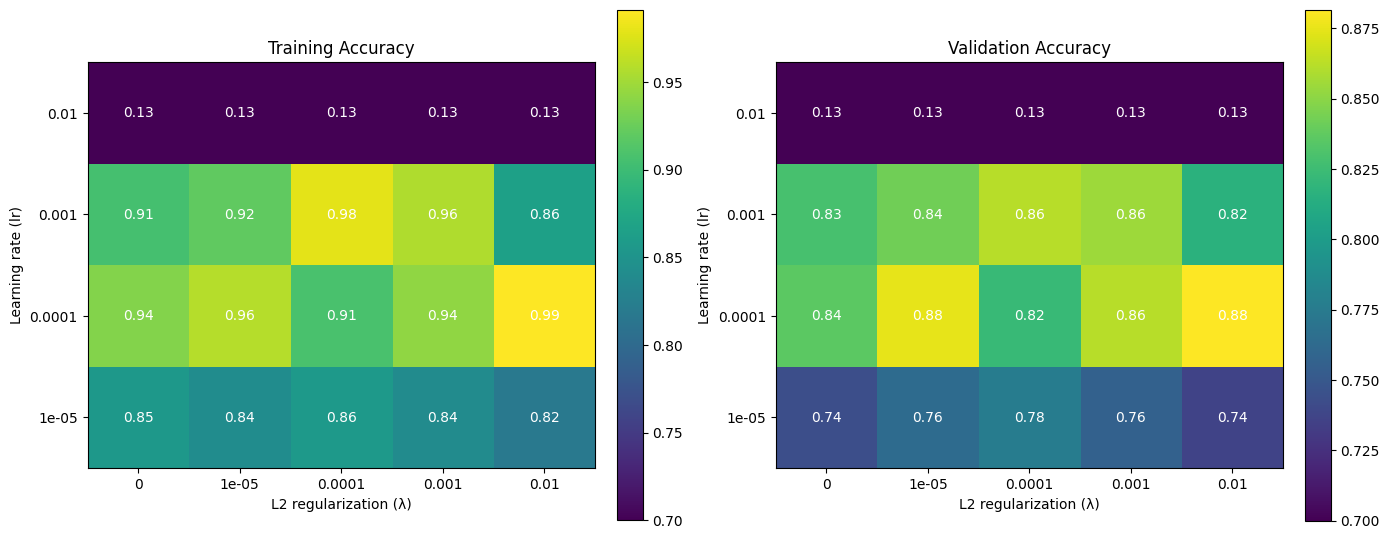

In [25]:

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

vmin = 0.7
vmax_train = np.max(train_accuracy)

# --- Heatmap Training ---
im1 = axes[0].imshow(train_accuracy, cmap='viridis', origin='lower', vmin=vmin, vmax=vmax_train)
axes[0].set_title("Training Accuracy")
axes[0].set_xlabel("L2 regularization (λ)")
axes[0].set_ylabel("Learning rate (lr)")

# set values on axis
axes[0].set_xticks(range(num_try_l2))
axes[0].set_xticklabels(lmd_val)
axes[0].set_yticks(range(num_try_lr))
axes[0].set_yticklabels(lr_val)

fig.colorbar(im1, ax=axes[0], fraction=0.046, pad=0.04)

# values
for i in range(num_try_lr):
    for j in range(num_try_l2):
        axes[0].text(j, i, f"{train_accuracy[i][j]:.2f}",
                     ha='center', va='center', color='white')
vmax_val = np.max(val_accuracy)

# --- Heatmap Validation ---
im2 = axes[1].imshow(val_accuracy, cmap='viridis', origin='lower', vmin=vmin, vmax=vmax_val)
axes[1].set_title("Validation Accuracy")
axes[1].set_xlabel("L2 regularization (λ)")
axes[1].set_ylabel("Learning rate (lr)")

axes[1].set_xticks(range(num_try_l2))
axes[1].set_xticklabels(lmd_val)
axes[1].set_yticks(range(num_try_lr))
axes[1].set_yticklabels(lr_val)

fig.colorbar(im2, ax=axes[1], fraction=0.046, pad=0.04)

# values
for i in range(num_try_lr):
    for j in range(num_try_l2):
        axes[1].text(j, i, f"{val_accuracy[i][j]:.2f}",
                     ha='center', va='center', color='white')

plt.tight_layout()
plt.savefig("heatmap.png")
plt.show()

In [19]:
#print train and val accuracy during best epoch during training respect of evaluated ones. 
for i in range(num_try_lr):
    for j in range(num_try_l2):
        # best ephoc
        best_epoch = history[i][j].history['val_loss'].index(
            min(history[i][j].history['val_loss'])
        )

        # Accuracy during training
        train_acc_best = history[i][j].history['accuracy'][best_epoch]
        val_acc_best = history[i][j].history['val_accuracy'][best_epoch]
        print(
            f"CNN (lr={lr_val[i]}, l2={lmd_val[j]}): "
            f"Train acc@best_val_loss={train_acc_best:.5f}, "
            f"Val acc@best_val_loss={val_acc_best:.5f}"
        )

        # --- Evaluation ---
        train_eval = CNN_s[i][j].evaluate(X_train, y_train, verbose=0)
        val_eval = CNN_s[i][j].evaluate(X_val, y_val, verbose=0)

        print(
            f"   Evaluated -> Train acc={train_eval[1]:.5f}, "
            f"Val acc={val_eval[1]:.5f}\n"
        )


CNN (lr=1e-05, l2=0): Train acc@best_val_loss=0.74590, Val acc@best_val_loss=0.74342
   Evaluated -> Train acc=0.85466, Val acc=0.74342

CNN (lr=1e-05, l2=1e-05): Train acc@best_val_loss=0.71871, Val acc@best_val_loss=0.76316
   Evaluated -> Train acc=0.84154, Val acc=0.76316

CNN (lr=1e-05, l2=0.0001): Train acc@best_val_loss=0.74824, Val acc@best_val_loss=0.77632
   Evaluated -> Train acc=0.85654, Val acc=0.77632

CNN (lr=1e-05, l2=0.001): Train acc@best_val_loss=0.74730, Val acc@best_val_loss=0.75658
   Evaluated -> Train acc=0.84060, Val acc=0.75658

CNN (lr=1e-05, l2=0.01): Train acc@best_val_loss=0.70558, Val acc@best_val_loss=0.73684
   Evaluated -> Train acc=0.81716, Val acc=0.73684

CNN (lr=0.0001, l2=0): Train acc@best_val_loss=0.83685, Val acc@best_val_loss=0.83553
   Evaluated -> Train acc=0.93671, Val acc=0.83553

CNN (lr=0.0001, l2=1e-05): Train acc@best_val_loss=0.86920, Val acc@best_val_loss=0.87500
   Evaluated -> Train acc=0.95827, Val acc=0.87500

CNN (lr=0.0001, l2=

# 3. Results

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step


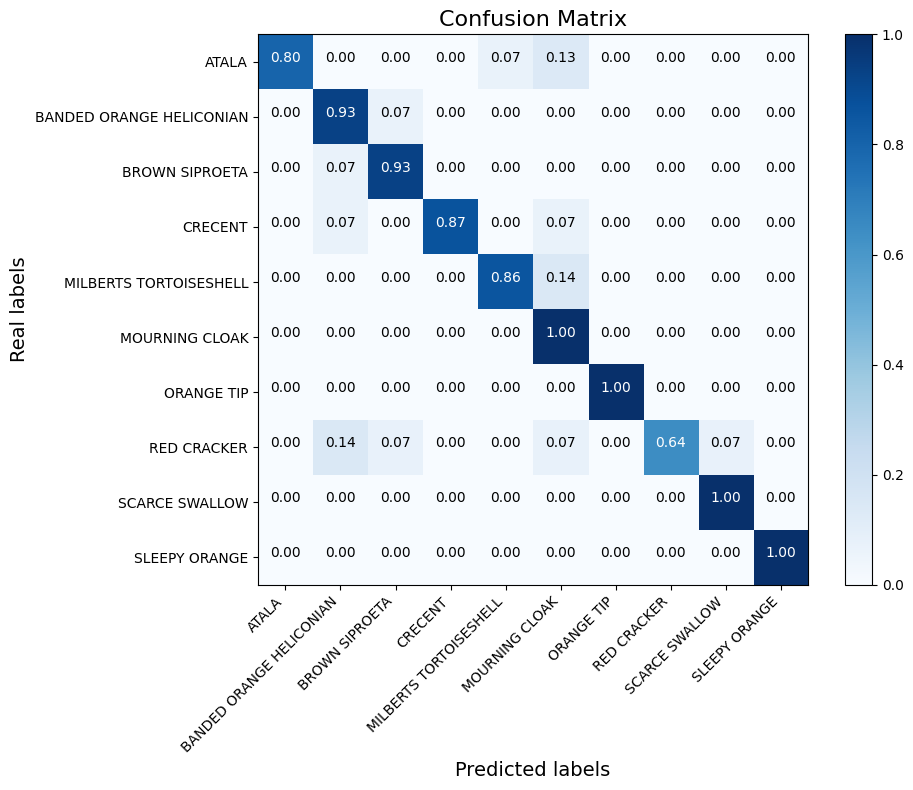

In [26]:
from sklearn.metrics import confusion_matrix
import itertools

# predictions on testset
y_pred_logits = CNN_s[best_i][best_j].predict(X_test)
y_pred = np.argmax(y_pred_logits, axis=1)

# confusion matrix
cm = confusion_matrix(y_test, y_pred)

# plot confusion matrix function
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion Matrix', cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.figure(figsize=(10, 8))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize=16)
    plt.colorbar()

    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45, ha="right")
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('Real labels', fontsize=14)
    plt.xlabel('Predicted labels', fontsize=14)
    plt.tight_layout()
    plt.savefig("confusion_matrix.png")
    plt.show()

# real species names
class_names = le.classes_

# make plot
plot_confusion_matrix(cm, classes=class_names, normalize=True, title='Confusion Matrix')


In [21]:
# classification report:
from sklearn.metrics import classification_report, confusion_matrix

# predictions
CNN_best = CNN_s[best_i][best_j]
y_pred_prob = CNN_best.predict(X_test)
y_pred = np.argmax(y_pred_prob, axis=1)

# True labels
y_true = y_test 

# Classification report
print(classification_report(y_true, y_pred, digits=3))

# Accuracy on test set
test_loss, test_acc = CNN_best.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {test_acc:.3f}")


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
              precision    recall  f1-score   support

           0      1.000     0.800     0.889        15
           1      0.778     0.933     0.848        15
           2      0.875     0.933     0.903        15
           3      1.000     0.867     0.929        15
           4      0.923     0.857     0.889        14
           5      0.769     1.000     0.870        20
           6      1.000     1.000     1.000        14
           7      1.000     0.643     0.783        14
           8      0.938     1.000     0.968        15
           9      1.000     1.000     1.000        16

    accuracy                          0.908       153
   macro avg      0.928     0.903     0.908       153
weighted avg      0.923     0.908     0.907       153

Test Accuracy: 0.908


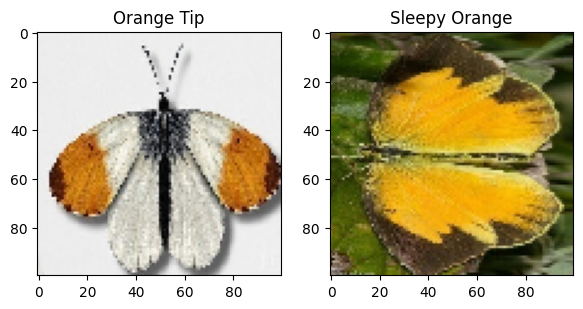

In [61]:
y_labels = y_test

class_label1 = 6
idx1 = np.where(y_labels == class_label1)[0][0]

class_label2 = 9
idx2 = np.where(y_labels == class_label2)[0][13]

fig, axes = plt.subplots(1, 2, figsize=(6, 3))

axes[0].imshow(X_test[idx1])
axes[0].set_title("Orange Tip")
#axes[0].axis("off")

axes[1].imshow(X_test[idx2])
axes[1].set_title("Sleepy Orange")
#axes[1].axis("off")

plt.tight_layout()
plt.savefig("best_spec.png")
plt.show()

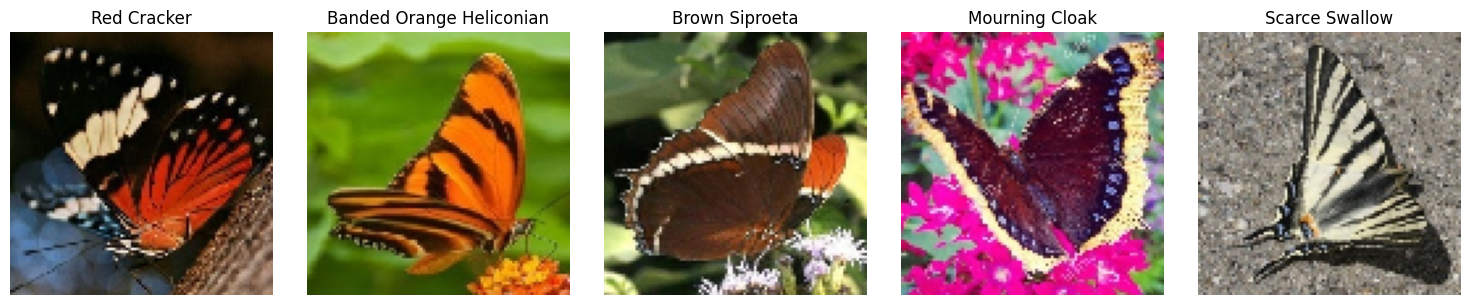

In [62]:
# visualize list
samples = [
    (7, 2),   
    (1, 1),  
    (2, 1),   
    (5, 1),   
    (8, 1)    
]

class_labels = ["Red Cracker", "Banded Orange Heliconian", "Brown Siproeta", "Mourning Cloak", "Scarce Swallow"]

fig, axes = plt.subplots(1, len(samples), figsize=(15, 3))

for i, ((class_label, pos), ax) in enumerate(zip(samples, axes)):
    idx = np.where(y_labels == class_label)[0][pos]
    ax.imshow(X_test[idx])
    ax.set_title(class_labels[i])
    ax.axis("off")

plt.tight_layout()
plt.savefig("worst_spec.png")
plt.show()